#### CAPSTONE PROJECT- MANUFACTURING PROCESS FEATURE SELECTION AND CATEGORIZATION

#### Author - Supriya Puri

##### About the dataset:
The dataset is acquired from UCI machine learning repository website. 

A diaper manufacturer wants to optimize the manufacturing process by detecting any problems that might lead to a bad quality product early on in the process. The capstone project focuses on diaper manufacturing quality. To ensure and predict quality, a diaper manufacturer needs to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc. The dataset is for the diaper manufacturing process.

The dataset consists of two files:

1. a dataset file containing 1567 examples, each with 591 features, presented in a 1567 x 591 matrix
2. a labels file listing the classifications and date time stamp for each example

Under the labels attribute: <br/> 
`-1` is for all the 'passed' products <br/>
`1` refers to 'failed' products

##### Data Flow Diagram of solving the manufacturing quality problem

With the increase in demand of diapers and to meet the constant change in the user requirements, there has been significant updates in the design and the manufacturing process for diaper making. Today's premium diapers are a far cry from yesteryear's cloth garments and the manufacturing processes now involve various tedious steps which needs to be carefully monitored to ensure good quality product.

1. Formation of the absorbent pad
2. Application of polymer and fibers on the absorbent pad.
3. Assembly of all the components using gluing, heating and ultrasonic welding.
4. Quality check to ensure maximum absorbency, comfort fit and no leakage using the meterials friendly to skin. 

To ensure quality and to reduce costs in the manufacturing process, a diaper manufacturer needs to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc. These monitors ensure that the temperatures needed to avoid melting of the materials on the absorbent pads and also the amount of glue needed to ensure maximum stickiness. Along with heat and glue levels, the polymer/fiber ratio should be 75:25 to 90:10.On the looks front, the diaper with and the absorbenct pad's thickness needs to be consistent and upto industry standard. 

A more cleared explanation for solving the manufacturing quality problem can be seen in the Data Flow Diagram below:

![layout](Data_flow_diagram.png)



To answer the questions in the decision box is where the data provided can be used. Using the machine learning models, the standard values can be set and the products can be considered passed or failed using the combinations of the sensor measurements recorded. 

##### Task:

We are assigned to use the SECOM dataset , visualise the data, find out the best features and use them to create a classification model based using Decision Tree classifier, Random Forest classifier and Support Vectore Metrics classifier and decide which of the above methods will be the best to seperate the defective and the quality approved products, to decide failed and passed products.

##### Read and merge data <br/>
We have the features in one file and the time and the results of quality tests in the other file and for our analysis, we will need to merge the files. 

In [1]:
#import required packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

`pd.read_csv` - reads a comma-separated values (csv) file into DataFrame. Since in our dataset there were no ',', so adding the delimiter for 'spaces' helps in storing the values as different columns instead of one. 

In [2]:
# read .data file, convert the data to a df
secom = pd.read_csv (r'./data/secom.data', delimiter=" ", header= None)
secom.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


The `secom_labels.data`  file contains classifications and date time stamp information. 

For classifications, '-1' specifies 'passed' products while '1' specifies the 'failed' products. 
Timestamp signifies the date and quality for the test. 

In [3]:
# read .data file, convert the data into a dataframe

secom_labels = pd.read_csv (r'./data/secom_labels.data', delimiter=" ", header= None)
secom_labels.head()


,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


Merge two df:  secom and secom_labels into a single dataframe 'data'. Ignore_index allows the new dataframe to ignore the previous column indexes and assign new. For 592 columns, the indexes range (from 0,591). To make identification easier for the target values and the features, I have renamed the classification column as "Pass/Fail" and the datatime as "Time"

In [4]:
data = pd.concat([secom, secom_labels], axis=1, ignore_index=True)
data = data.rename(columns={590: "Pass/Fail", 591: "Time"})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,Pass/Fail,Time
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00


In [5]:
data.shape # print shape of the data to find out the number of rows and columns

(1567, 592)

The merged dataset has 1567 rows and 592 columns

In [6]:
data.dtypes #print the datatypes

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
587          float64
588          float64
589          float64
Pass/Fail      int64
Time          object
Length: 592, dtype: object

All the attributes are numeric and the time stamp is an object file

##### Clean and prepare data 

Find the null values. 
`NaN` refers to 'not a number'.

These `null values` adversely affect the performance and accuracy of any machine learning algorithm. So, it is very important to remove null values from the dataset before applying any machine learning algorithm to that dataset.

In [7]:
data.isnull().any().any() # check if there are null values

True

In [8]:
data.isnull().sum() # find total number of null values for each attribute

0             6
1             7
2            14
3            14
4            14
             ..
587           1
588           1
589           1
Pass/Fail     0
Time          0
Length: 592, dtype: int64

Replacing the `null values` with 0

In [9]:
data = data.replace(np.NaN, 0) 
# again, checking if there is any NULL values left
data.isnull().any().any()

False

`False` here confirms that there are no null values in the dataset now. 

In [10]:
data.shape #Verifying the number of columns and rows again after checking null count

(1567, 592)

**Rearrange the data to include the "Time" column as index 0 instead of index 591**

We want to keep the date and time of testing as the first column and the target column as the last for easier analysis

In [11]:
cols = data.columns.tolist() # saving the columns in a list for re-arrangement
cols = cols[-1:] + cols[:-1]
data = data[cols] # adding the new column arrangement in the dataset
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


**Convert Timestamp to Datetime Object**

In [12]:
data["Time"] = pd.to_datetime(data['Time']).dt.strftime("%Y-%m-%d %H:%M")
print(data.head())
print("Minimal Date=%s, Maximal Date=%s"%(min(data["Time"]), \
                                          max(data["Time"])))

               Time        0        1          2          3       4      5  \
0  2008-07-19 11:55  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...    0.0000  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...    0.0000  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0  0.00

In [13]:
data.dtypes # checking datatypes again. 

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

##### Data Correlation

When two sets of data are strongly linked together we say they have a High Correlation. Correlation is Positive when the values increase together, and. Correlation is Negative when one value decreases as the other increases. 
`corr()` is used to find the pairwise correlation of all columns in the dataframe. Any `NaN` values are automatically ignored. 

In [14]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.008706,0.006129,0.010738,-0.050979,0.009959,...,-0.033622,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489,0.006149
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.030127,-0.031616,-0.025086,0.027609,0.003704,...,0.043107,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464,-0.019672
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.990089,0.818770,0.747230,0.002600,-0.045731,...,0.038416,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434,0.024929
3,0.009448,0.006021,0.323782,1.000000,-0.054015,0.286397,-0.119180,0.279646,-0.108217,0.051567,...,0.000922,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449,-0.016341
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,0.007041,-0.034736,-0.475861,-0.020082,0.053859,...,0.107783,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741,-0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.019435,-0.005877,0.051943,0.017642,0.032423,...,-0.206109,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741,0.004448
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,-0.003077,0.016362,-0.006335,0.027655,0.057856,...,0.227096,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503,0.035670
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,-0.004919,0.013832,-0.014288,0.033729,0.059321,...,0.216292,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898,0.031447
589,0.021489,0.044464,-0.030434,-0.084449,0.050741,-0.026117,0.002246,-0.067263,-0.016895,0.004106,...,0.431632,0.028502,-0.002453,-0.002750,-0.003266,-0.484741,0.391503,0.389898,1.000000,-0.002472


**Get a count of the classification column for how many test are passing and how many failed.**

In [15]:
data['Pass/Fail']

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: Pass/Fail, Length: 1567, dtype: int64

In [16]:
target_mapping = {-1: 0, 1: 1} # 0 for passed and 1 for failed
data['Pass/Fail']= data['Pass/Fail'].map(target_mapping)

In [17]:
data['Pass/Fail'] = data['Pass/Fail'].astype('int')

In [18]:
data['Pass/Fail'].value_counts()# -1 is pass and 1 is fail

0    1463
1     104
Name: Pass/Fail, dtype: int64

from the counts above, '1463' products passed the quality test while '104' failed

##### Data visaualisation

###### Class Feature Distribution:
Plot counts of failed and passed quality tests

Text(0.5, 1.0, 'Counts of Products which passed Quality check and the ones which failed')

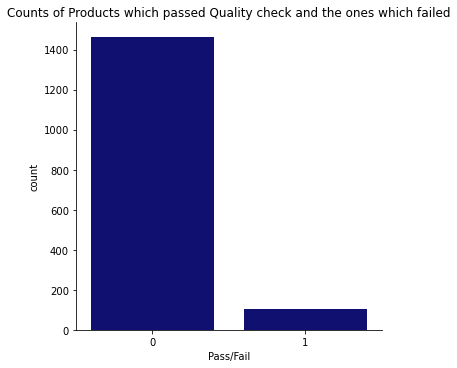

In [19]:
sns.catplot(x = 'Pass/Fail', data = data, kind = 'count', color = 'navy');
plt.title("Counts of Products which passed Quality check and the ones which failed")

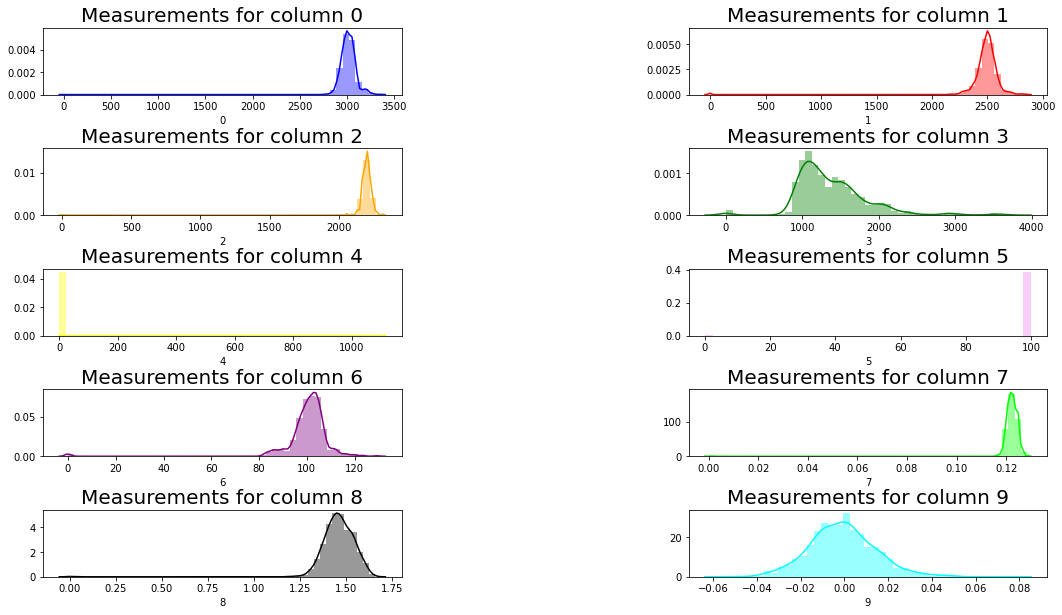

In [20]:
# distribution plot to see first ten columns distribution

plt.rcParams['figure.figsize'] = (18, 16)
plt.subplots_adjust( bottom=0.5, top= 1.5, wspace= .8, hspace= .8)

color = ['blue', 'red', 'orange', 'green', 'yellow', 'violet','purple', 'lime', 'black', 'aqua' ]
# i = range(0,10)
for i in range(10): 
    plt.subplot(10, 2, i+1)
    sns.distplot(data[i], color = color[i])
    plt.title('Measurements for column '+ str(i), fontsize = 20)

plt.show()

##### Correlation Distribution to highlight highly correlated features

Text(0.5, 1.0, 'Heatmap for the Data Correlation')

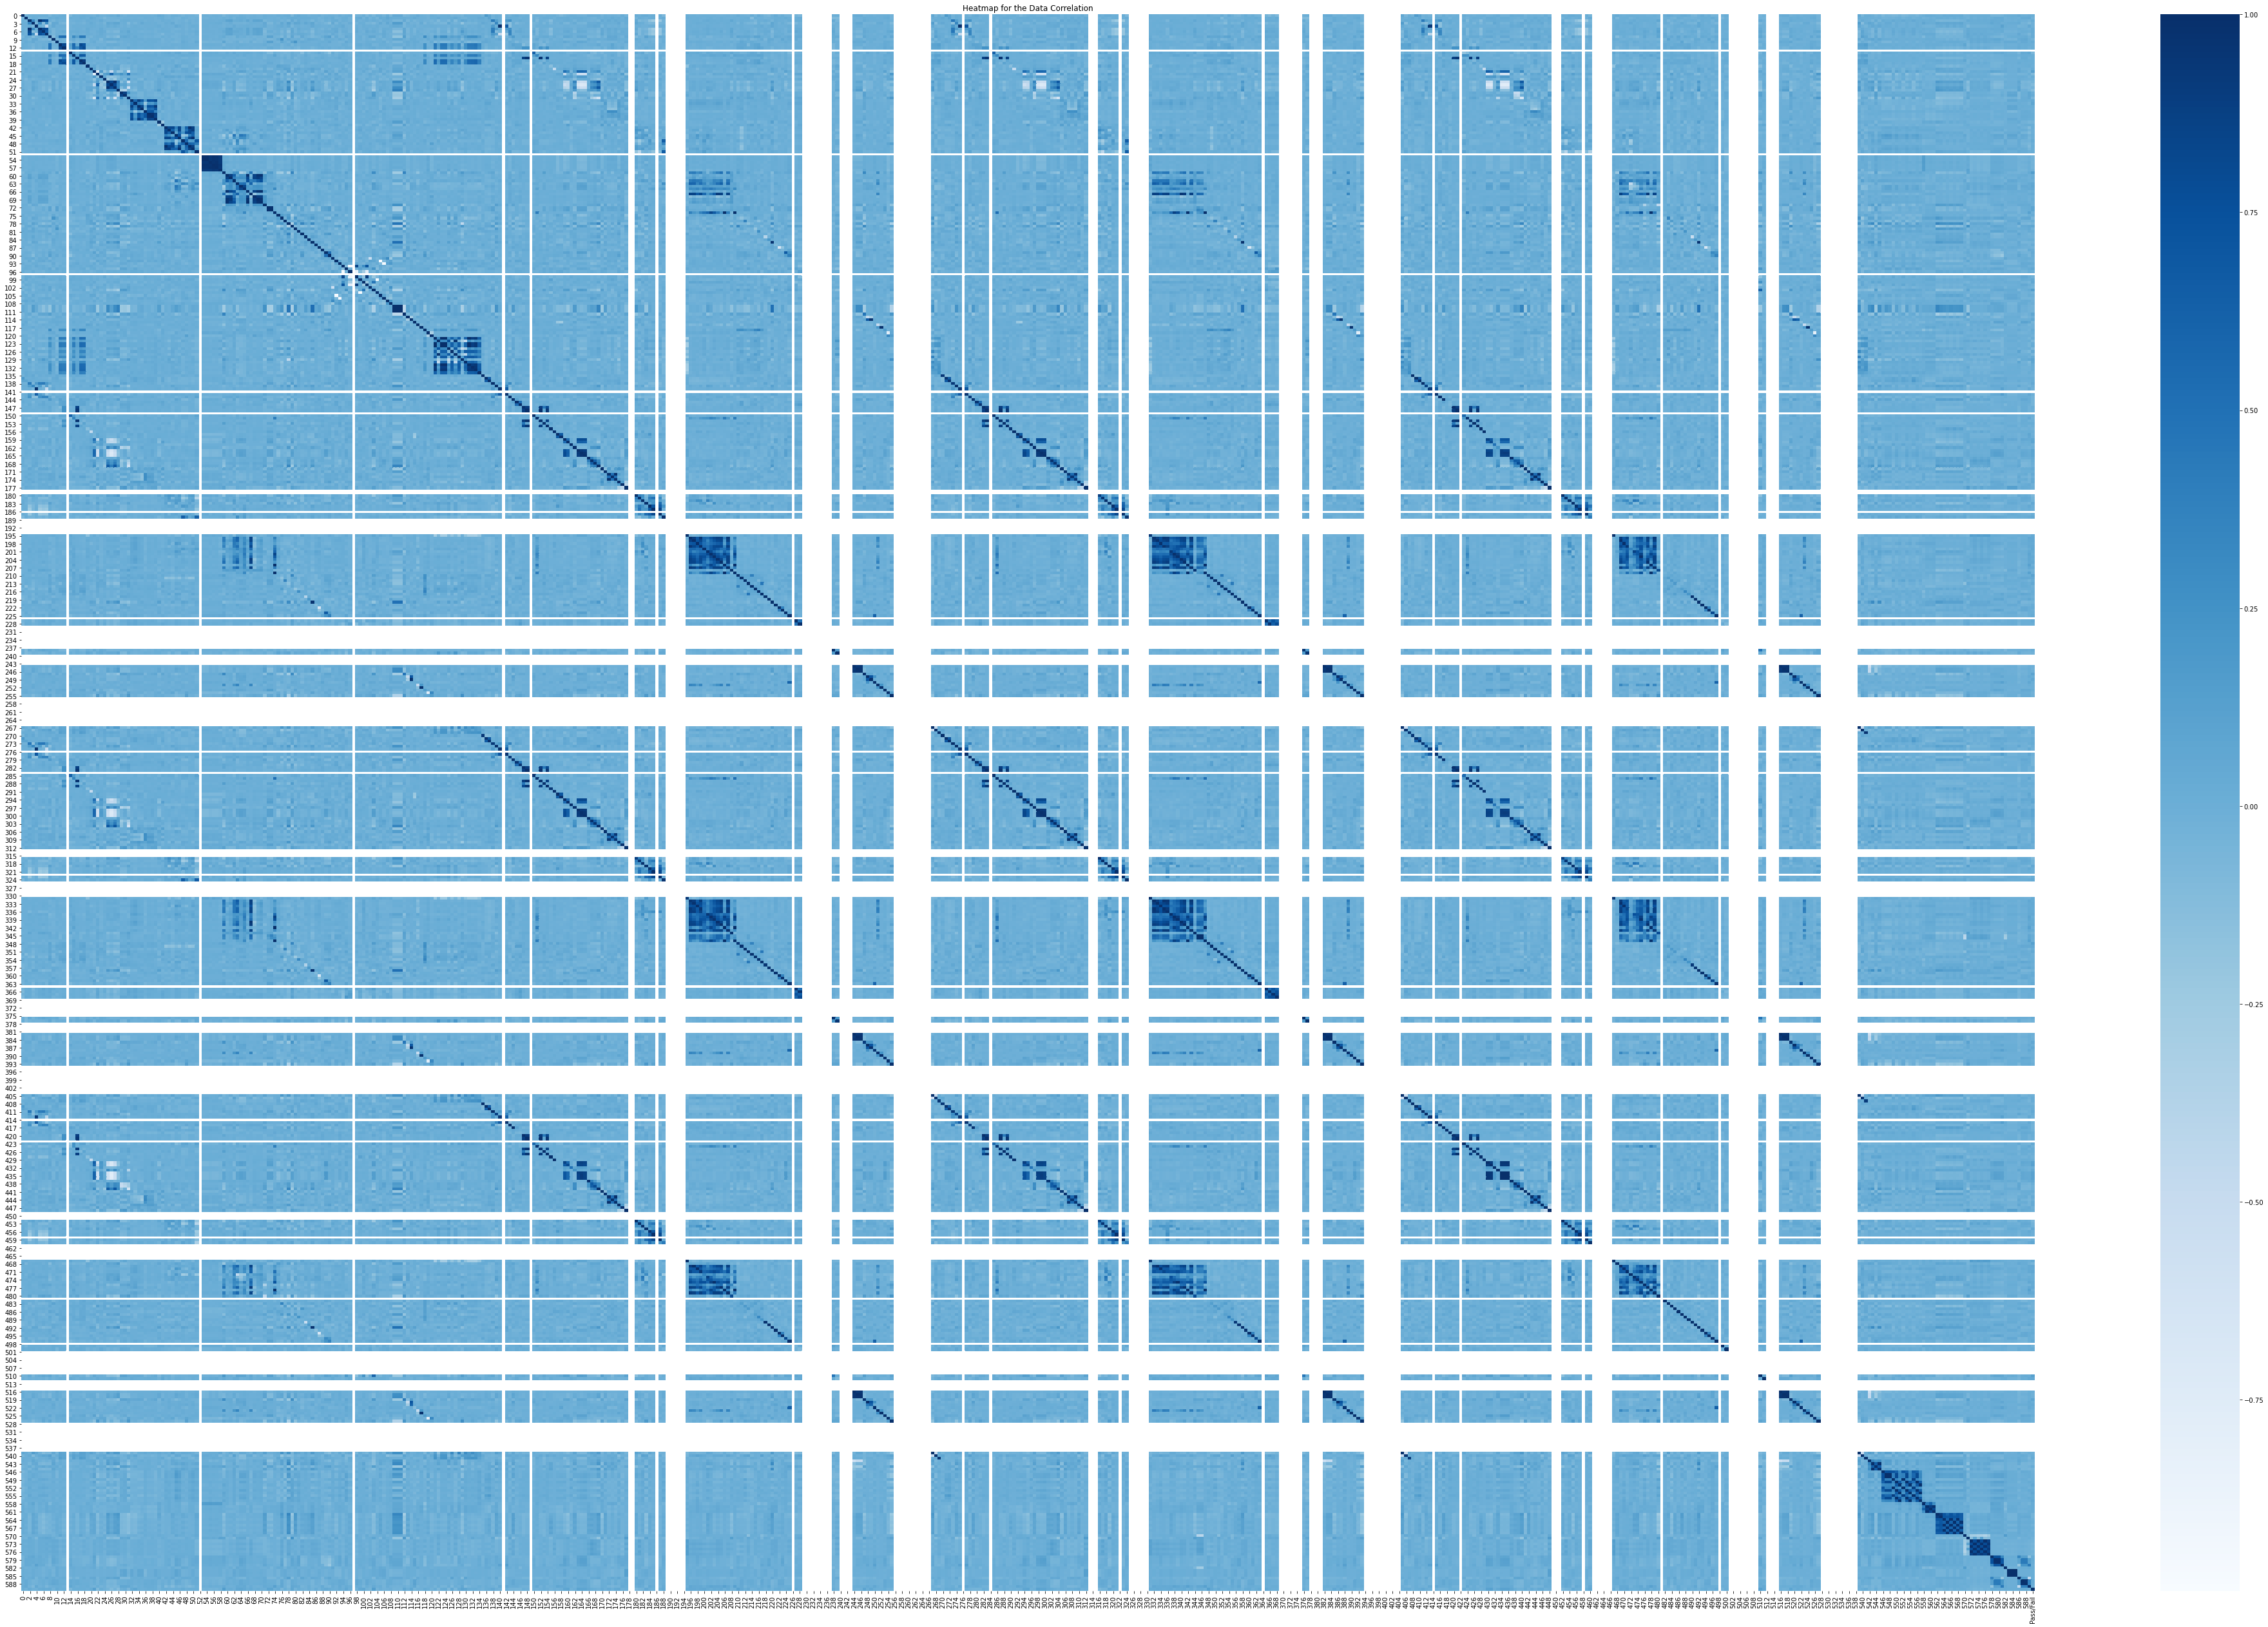

In [21]:
plt.rcParams['figure.figsize'] = (70, 45)
sns.heatmap(data.corr(), cmap= 'Blues')
plt.title('Heatmap for the Data Correlation')

##### Find Correlation  of target variable with independent Variables

Divide dataset into two dataframes `with and without the target features` so as to plot numeric variables correlation w/ target

In [22]:
df_without_target =  data.iloc[:,:-1] #load all features excluding the diagnosis into X dataframe
df_only_target = data['Pass/Fail'] # load diagnosis (malignant or benign)into Y dataframe

Numeric variables correlation w/ target (1,0)

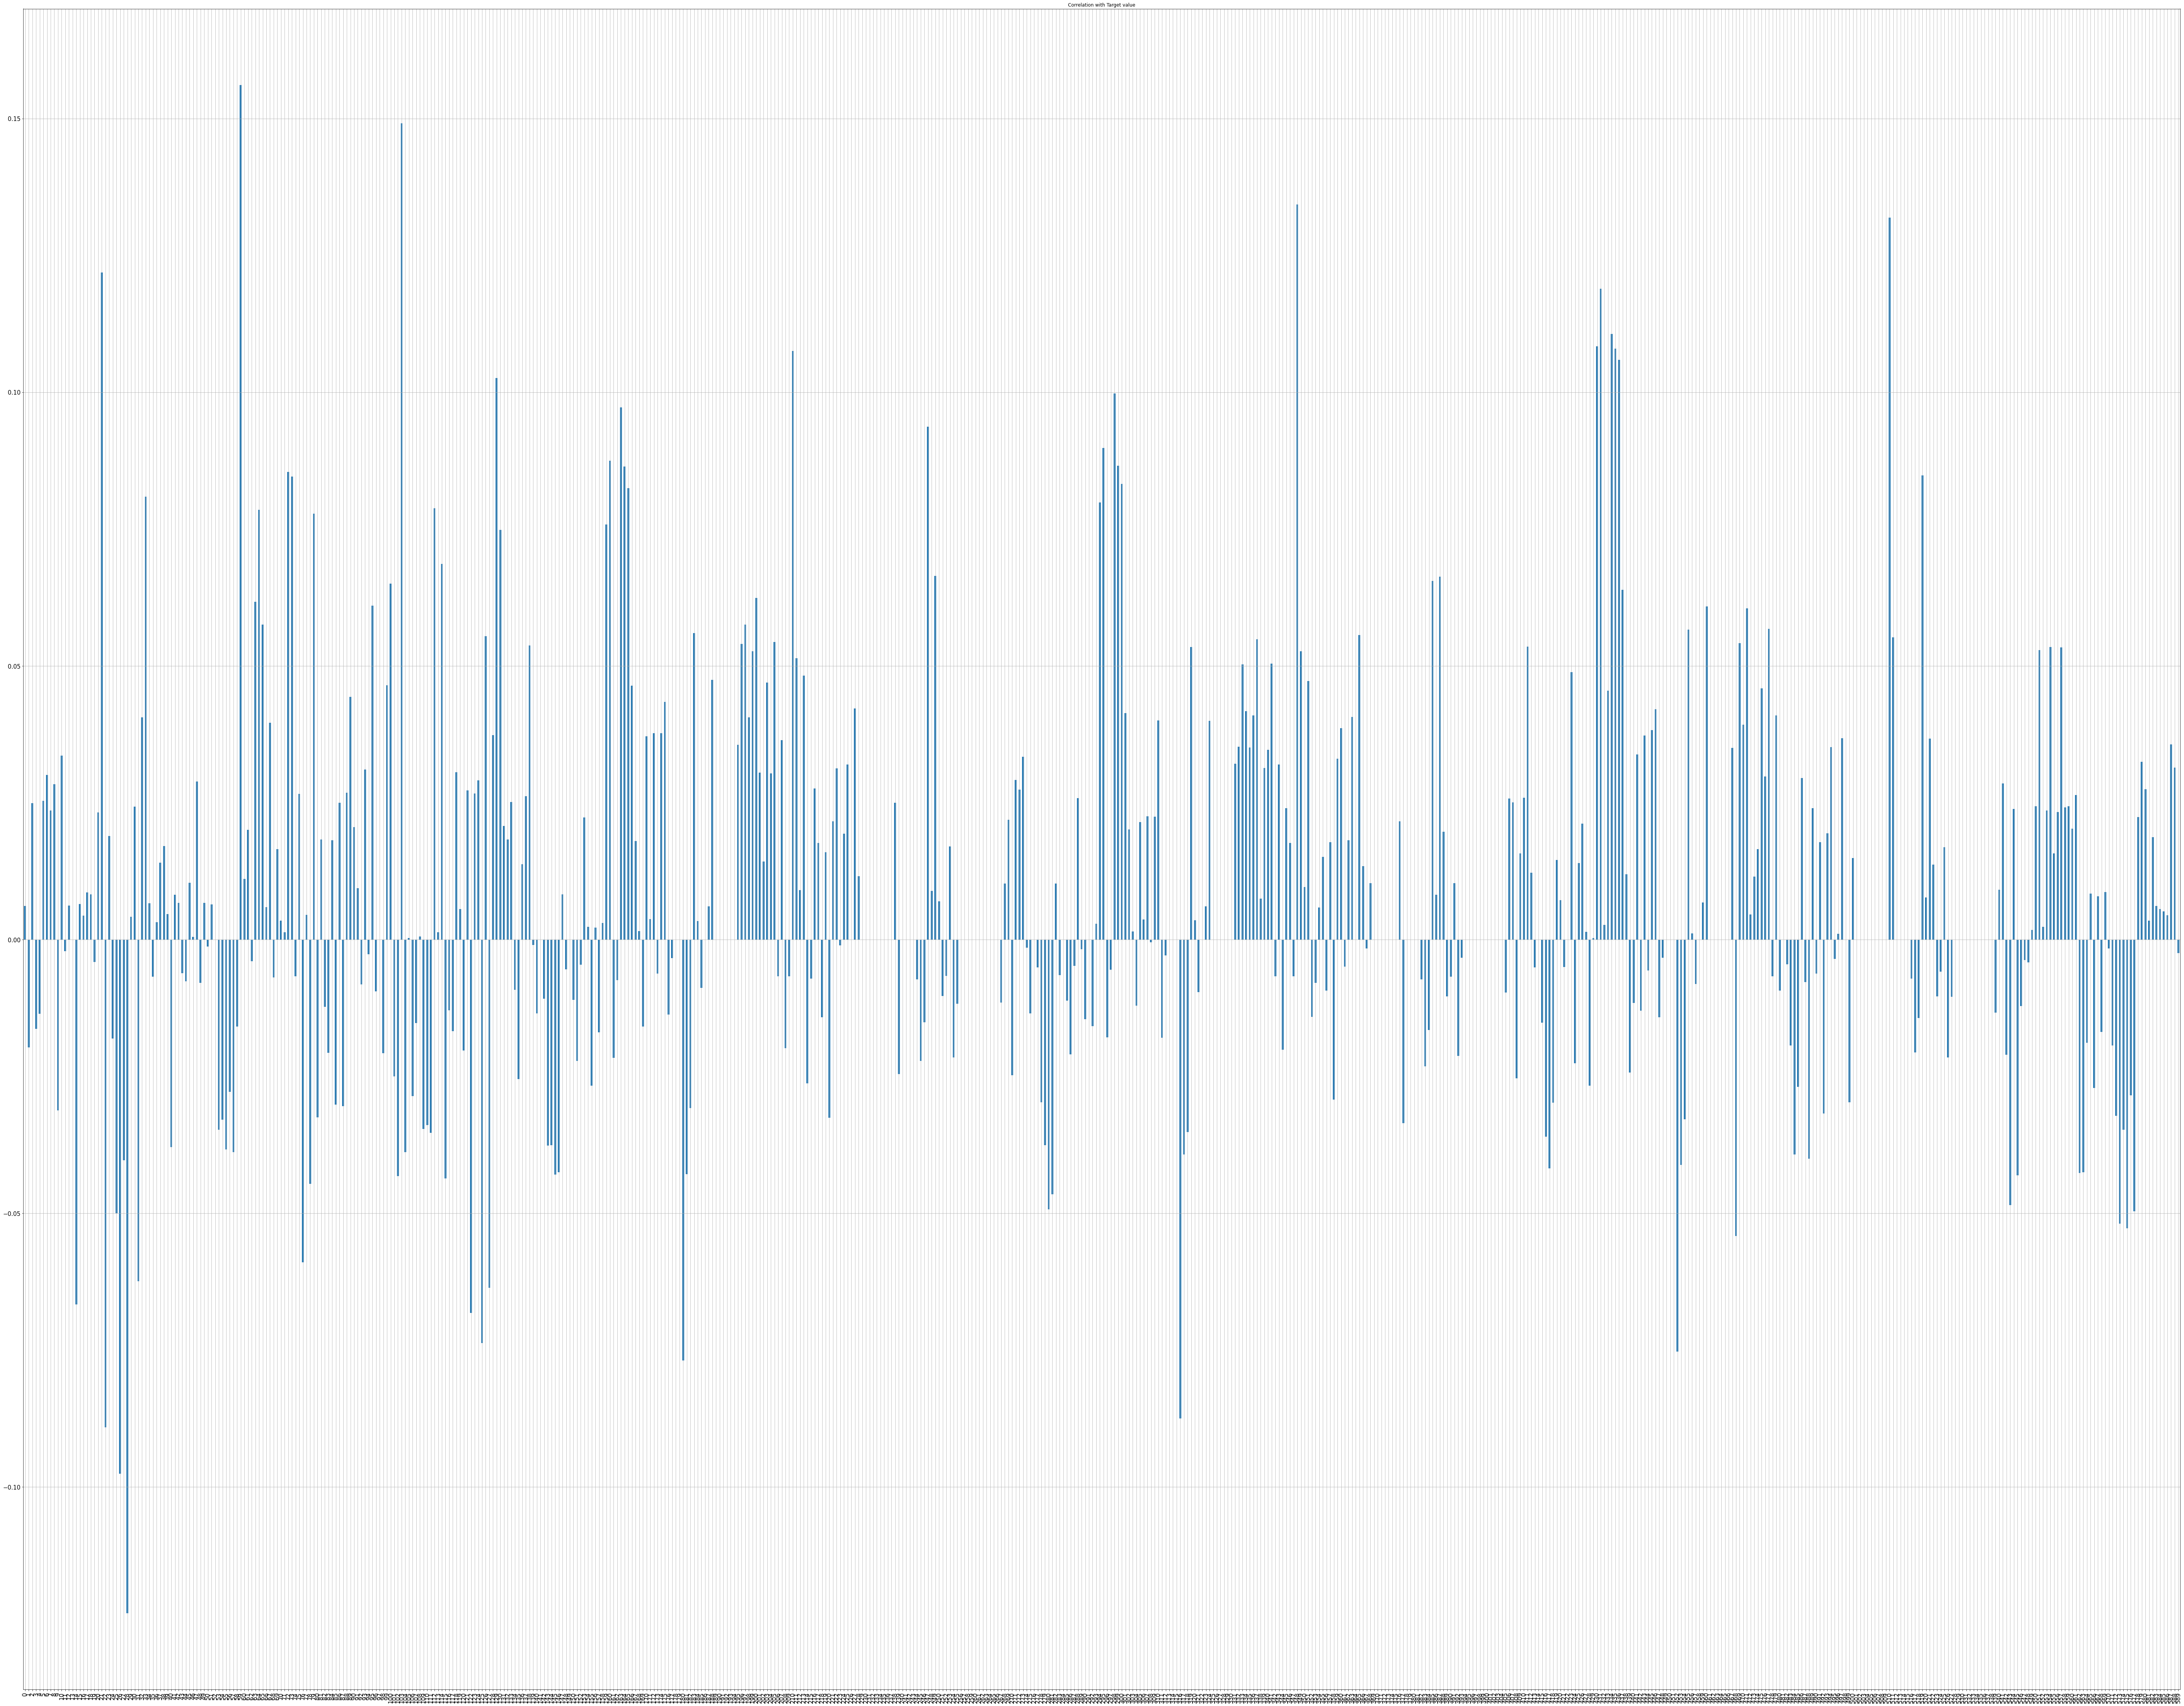

In [23]:
# Correlation with independent Variable 
ax = df_without_target.corrwith(df_only_target).plot.bar(
        figsize = (100, 80), title = "Correlation with Target value", fontsize = 15,
        rot = 90, grid = True)

plt.show()

**Seperating the `independent variables` and the `dependent target variable`** <br/>
Creating two new dataframes X and Y highlighting the features needed for quality tests and the test results "Pass/Fail"

In [24]:
X = data.iloc[:, 1:-1] # features excluding the time
Y = data[['Pass/Fail']] # target variable passed /failed
X.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [25]:
Y.head() # product quality whether pass or fail

,Pass/Fail
0,0
1,0
2,1
3,0
4,0


Saving the categorical columns in an array

In [26]:
cat_cols = data.select_dtypes(['object']).columns # category columns
cat_cols

Index(['Time'], dtype='object')

Saving the numeric columns in an array

In [27]:
num_cols = data.select_dtypes(['float64']).columns # numeric columns
num_cols

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       580, 581, 582, 583, 584, 585, 586, 587, 588, 589],
      dtype='object', length=590)

### Split the dataset into train, validation and test sets using the proper function in sklearn.

Import the required packages for machine learning algorithms

In [28]:
from imblearn.over_sampling import SMOTE # class imbalance
from sklearn.model_selection import train_test_split # train test the datset
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decisiontree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.svm import SVC # support vector classifier
# accuracy, confusion matrix, precision, recall, f1, classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,precision_score, recall_score
from sklearn.inspection import permutation_importance # for feature importance
from sklearn.model_selection import RandomizedSearchCV # for hyperparamter search
from sklearn.preprocessing import StandardScaler # scaling the dataset


In [29]:
#specify ratio to divide the dataset into train, validate and test
train_ratio = 0.75 # 75% of dataset
validation_ratio = 0.15 # 15% of dataset
test_ratio = 0.10 # 10% of dataset

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

# print shape of X and Y train, validation and test dataframes 
print(X_train.shape,X_val.shape,X_test.shape)
print(Y_train.shape,Y_val.shape, Y_test.shape)

(1175, 590) (235, 590) (157, 590)
(1175, 1) (235, 1) (157, 1)


##### Scaling the feature data.

`Normalization` is the process of scaling individual samples to have unit norm. All the values lie between 0 and 1, and the outliers are removed, but still remain visible within our normalized data. However, the values become now more consistent with each other, which help to evaluate the output of our future models better.

StandardScaler rescales the data set such that all feature values are in the range [0,1].

In [30]:
# Perform Z-standard normalization (to-> N(0,1))
znormalizer = StandardScaler()

# fit on train set for numerical cols
znormalizer.fit(X_train[num_cols])

StandardScaler()

In [31]:
X_train_norm = pd.DataFrame(znormalizer.transform(X_train[num_cols]), columns = num_cols) # normalized train set
X_val_norm = pd.DataFrame(znormalizer.transform(X_val[num_cols]), columns = num_cols) # normalized validation set
X_test_norm = pd.DataFrame(znormalizer.transform(X_test[num_cols]), columns = num_cols) # normalized test set

In [32]:
# verify the column and rows count is same as the split dataset 
print("X_train shape = {}".format(X_train.shape))
print("X_train_norm shape = {}".format(X_train_norm.shape))

print("X_val shape = {}".format(X_val.shape))
print("X_val_norm shape = {}".format(X_val_norm.shape))

print("X_test shape = {}".format(X_test.shape))
print("X_test_norm shape = {}".format(X_test_norm.shape))

X_train shape = (1175, 590)
X_train_norm shape = (1175, 590)
X_val shape = (235, 590)
X_val_norm shape = (235, 590)
X_test shape = (157, 590)
X_test_norm shape = (157, 590)


### Check model accuracy using Logistic Regression for class imbalanced data

##### LOGISTIC REGRESSION:

`Logistic regression` is a classification algorithm used to assign observations to a discrete set of classes. It is a predictive analysis algorithm and based on the concept of probability. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud. 

Here we are using Logistic Regression to predict the quality tests 'passed or not'. 

Generating a machine learning model without dealing with class imbalances

In [33]:
logreg = LogisticRegression(C = 1000) 
# 'C'- Inverse of regularization strength; must be a positive float.
#Like in support vector machines, smaller values specify stronger regularization.
logreg.fit(X_train_norm, Y_train)
Y_predict_train = logreg.predict(X_train_norm)
Y_predict_val = logreg.predict(X_val_norm)

In [34]:

print('Accuracy is :{:.2f}% '.format(accuracy_score(Y_val,Y_predict_val)*100))
print('Classification Report is \n'+ classification_report(Y_val,Y_predict_val))
print('Confusion Matrix is \n')
print(confusion_matrix(Y_val,Y_predict_val))

Accuracy is :89.36% 
Classification Report is 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       222
           1       0.17      0.23      0.19        13

    accuracy                           0.89       235
   macro avg       0.56      0.58      0.57       235
weighted avg       0.91      0.89      0.90       235

Confusion Matrix is 

[[207  15]
 [ 10   3]]


In [35]:
precision_train = precision_score(Y_train, Y_predict_train, pos_label = 0) * 100
precision_val = precision_score(Y_val, Y_predict_val, pos_label = 0) * 100

F1_score_train = f1_score(Y_train, Y_predict_train, pos_label = 0) * 100
F1_score_val = f1_score(Y_val, Y_predict_val, pos_label = 0) * 100

recall_train = recall_score(Y_train,Y_predict_train, pos_label = 0) * 100
recall_val = recall_score(Y_val, Y_predict_val, pos_label = 0) * 100

print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the training data.".format(precision_train, recall_train, F1_score_train ))
print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the validation data.".format(precision_val, recall_val, F1_score_val))

Precision = 100% , f1 = 100%  and recall = 100% on the training data.
Precision = 95% , f1 = 93%  and recall = 94% on the validation data.


### Handling class imbalance using SMOTE:

`SMOTE` stands for 'Synthetic Minority Oversampling Technique'. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

In [36]:
smote = SMOTE()

In [37]:
X_train_smote, Y_train_smote = smote.fit_sample(X_train_norm, Y_train)

##### LOGISTIC REGRESSION
(after balancing the dataset with equal number of passed and failed tests)

In [38]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, Y_train_smote)
Y_predict_train = logreg.predict(X_train_smote)
Y_predict_val = logreg.predict(X_val_norm)

In [39]:
print('Accuracy is :{:.2f}% '.format(accuracy_score(Y_val,Y_predict_val)*100))
print('Classification Report is \n'+ classification_report(Y_val,Y_predict_val))
print('Confusion Matrix is \n')
print(confusion_matrix(Y_val,Y_predict_val))

Accuracy is :86.38% 
Classification Report is 
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       222
           1       0.12      0.23      0.16        13

    accuracy                           0.86       235
   macro avg       0.54      0.57      0.54       235
weighted avg       0.91      0.86      0.88       235

Confusion Matrix is 

[[200  22]
 [ 10   3]]


In [40]:
precision_train = precision_score(Y_train_smote, Y_predict_train, pos_label = 0) * 100
precision_val = precision_score(Y_val, Y_predict_val, pos_label = 0) * 100

F1_score_train = f1_score(Y_train_smote, Y_predict_train, pos_label = 0) * 100
F1_score_val = f1_score(Y_val, Y_predict_val, pos_label = 0) * 100

recall_train = recall_score(Y_train_smote,Y_predict_train, pos_label = 0) * 100
recall_val = recall_score(Y_val, Y_predict_val, pos_label = 0) * 100

print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the training data.".format(precision_train, recall_train, F1_score_train ))
print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the validation data.".format(precision_val, recall_val, F1_score_val))

Precision = 100% , f1 = 99%  and recall = 100% on the training data.
Precision = 95% , f1 = 90%  and recall = 93% on the validation data.


###### Comparision between imbalanced classes and balanced class machine learning models

By increasing the instances of the failed cases using SMOTE, following changes can be seen:

1. Accuracy dropped when the failed cases were increased using SMOTE.
2. A significant change has been seen in the False Negative cases which is the reason for the reduced accuracy and reduced recall. 
3. The change in False Negative values lead to increase in the True Negative values affecting sensitivity. 

##### Feature Selection

Feature Selection or attribute selection is a process by which you automatically search for the best subset of attributes in your dataset. The notion of “best” is relative to the problem you are trying to solve

##### Mutual Information

`Mutual information` has been frequently used to perform feature selection in machine learning. For a given feature, we can measure the feature’s mutual information with the class labels.

If the mutual information is high, then the feature is a strong indicator of the class. For example, if author A always includes their name in their documents, then the mutual information between their name and the class will be extremely high.

Also, if we have too many features to consider, we can use mutual information between features to remove those that are redundant. If author A always includes their name and their home town, then we can safely remove their home town from our vocabulary and still perform well on the task.

We will try to use feature selection and remove less correlated features from the dataset and then again train the machine learning model with the training data to predict results and calculate accuracies , precision for both class imbalanced and balanced scenarios. 

In [41]:
# Finding correlation among the independent features
corr = X.corr()
print(corr)

          0         1         2         3         4         5         6    \
0    1.000000 -0.047782  0.007590  0.009448 -0.000915  0.008706  0.006129   
1   -0.047782  1.000000 -0.030448  0.006021  0.002192 -0.030127 -0.031616   
2    0.007590 -0.030448  1.000000  0.323782  0.020438  0.990089  0.818770   
3    0.009448  0.006021  0.323782  1.000000 -0.054015  0.286397 -0.119180   
4   -0.000915  0.002192  0.020438 -0.054015  1.000000  0.007041 -0.034736   
..        ...       ...       ...       ...       ...       ...       ...   
585  0.019522  0.003821 -0.004263  0.023288 -0.001636 -0.006520 -0.027417   
586  0.044745 -0.009219  0.015733  0.038755 -0.043693  0.019435 -0.005877   
587  0.005233  0.039479 -0.007090 -0.038371 -0.030930 -0.003077  0.016362   
588  0.003918  0.040500 -0.009122 -0.033648 -0.026046 -0.004919  0.013832   
589  0.021489  0.044464 -0.030434 -0.084449  0.050741 -0.026117  0.002246   

          7         8         9    ...       580       581       582  \
0  

In [42]:
# finding the highly correlated columns and adding them to an array so as to use for further analysis
arr = []
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 > 0.90:
                arr.append(X.columns[i])
noduplicate_arr = set(arr)
print(len(noduplicate_arr))


356


In [43]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [44]:
# creating a new df with highly correlated column to be used for further analysis
filter_X = X[noduplicate_arr]
filter_X.head()

,2,4,5,16,17,18,25,27,34,37,...,575,576,577,579,580,583,584,585,587,588
0,2187.7333,1.3602,100.0,10.0433,0.9680,192.3963,0.8955,3.0490,50.6170,66.3141,...,0.1026,1.6765,14.9509,0.0000,0.0000,0.0118,0.0035,2.3630,0.0000,0.0000
1,2230.4222,0.8294,100.0,9.2599,0.9701,191.2872,1.2973,7.3900,50.6596,64.9193,...,0.0772,1.1065,10.9003,0.0201,0.0060,0.0223,0.0055,4.4447,0.0201,0.0060
2,2186.4111,1.5102,100.0,9.3144,0.9674,192.7035,1.3122,7.5788,50.1530,65.8389,...,0.0640,2.0952,9.2721,0.0484,0.0148,0.0157,0.0039,3.1745,0.0484,0.0148
3,2199.0333,1.3204,100.0,9.6924,0.9687,192.1557,1.3137,7.3145,50.5100,65.1951,...,0.0525,1.7585,8.5831,0.0149,0.0044,0.0103,0.0025,2.0544,0.0149,0.0044
4,2233.3667,1.5334,100.0,10.3387,0.9735,191.6037,1.2887,7.2748,50.2480,66.1542,...,0.0706,1.6597,10.9698,0.0000,0.0000,0.4766,0.1045,99.3032,0.0149,0.0044


In [45]:
print("No of rows and columns in filtered df"+ str(filter_X.shape))
print("No of rows and columns in the dataframe X with all features"+ str(X.shape))


No of rows and columns in filtered df(1567, 356)
No of rows and columns in the dataframe X with all features(1567, 590)


Feature selection reduced the column attributes in the dataset from 590 to 356.

The Mutual Information is a measure of the similarity between two labels of the same data. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.
The Mutual Information score expresses the extent to which observed frequency of co-occurrence differs from what we would expect. High mutual information indicates a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables means the variables are independent.

In [46]:
# Continuous - Continuous Mutual information score:
from sklearn.feature_selection import mutual_info_regression

# x and y are both continous:
mi_score = mutual_info_regression(filter_X, Y)

print("Mutual information = {:0.4f}".format(mi_score[0]))

Mutual information = 0.0120


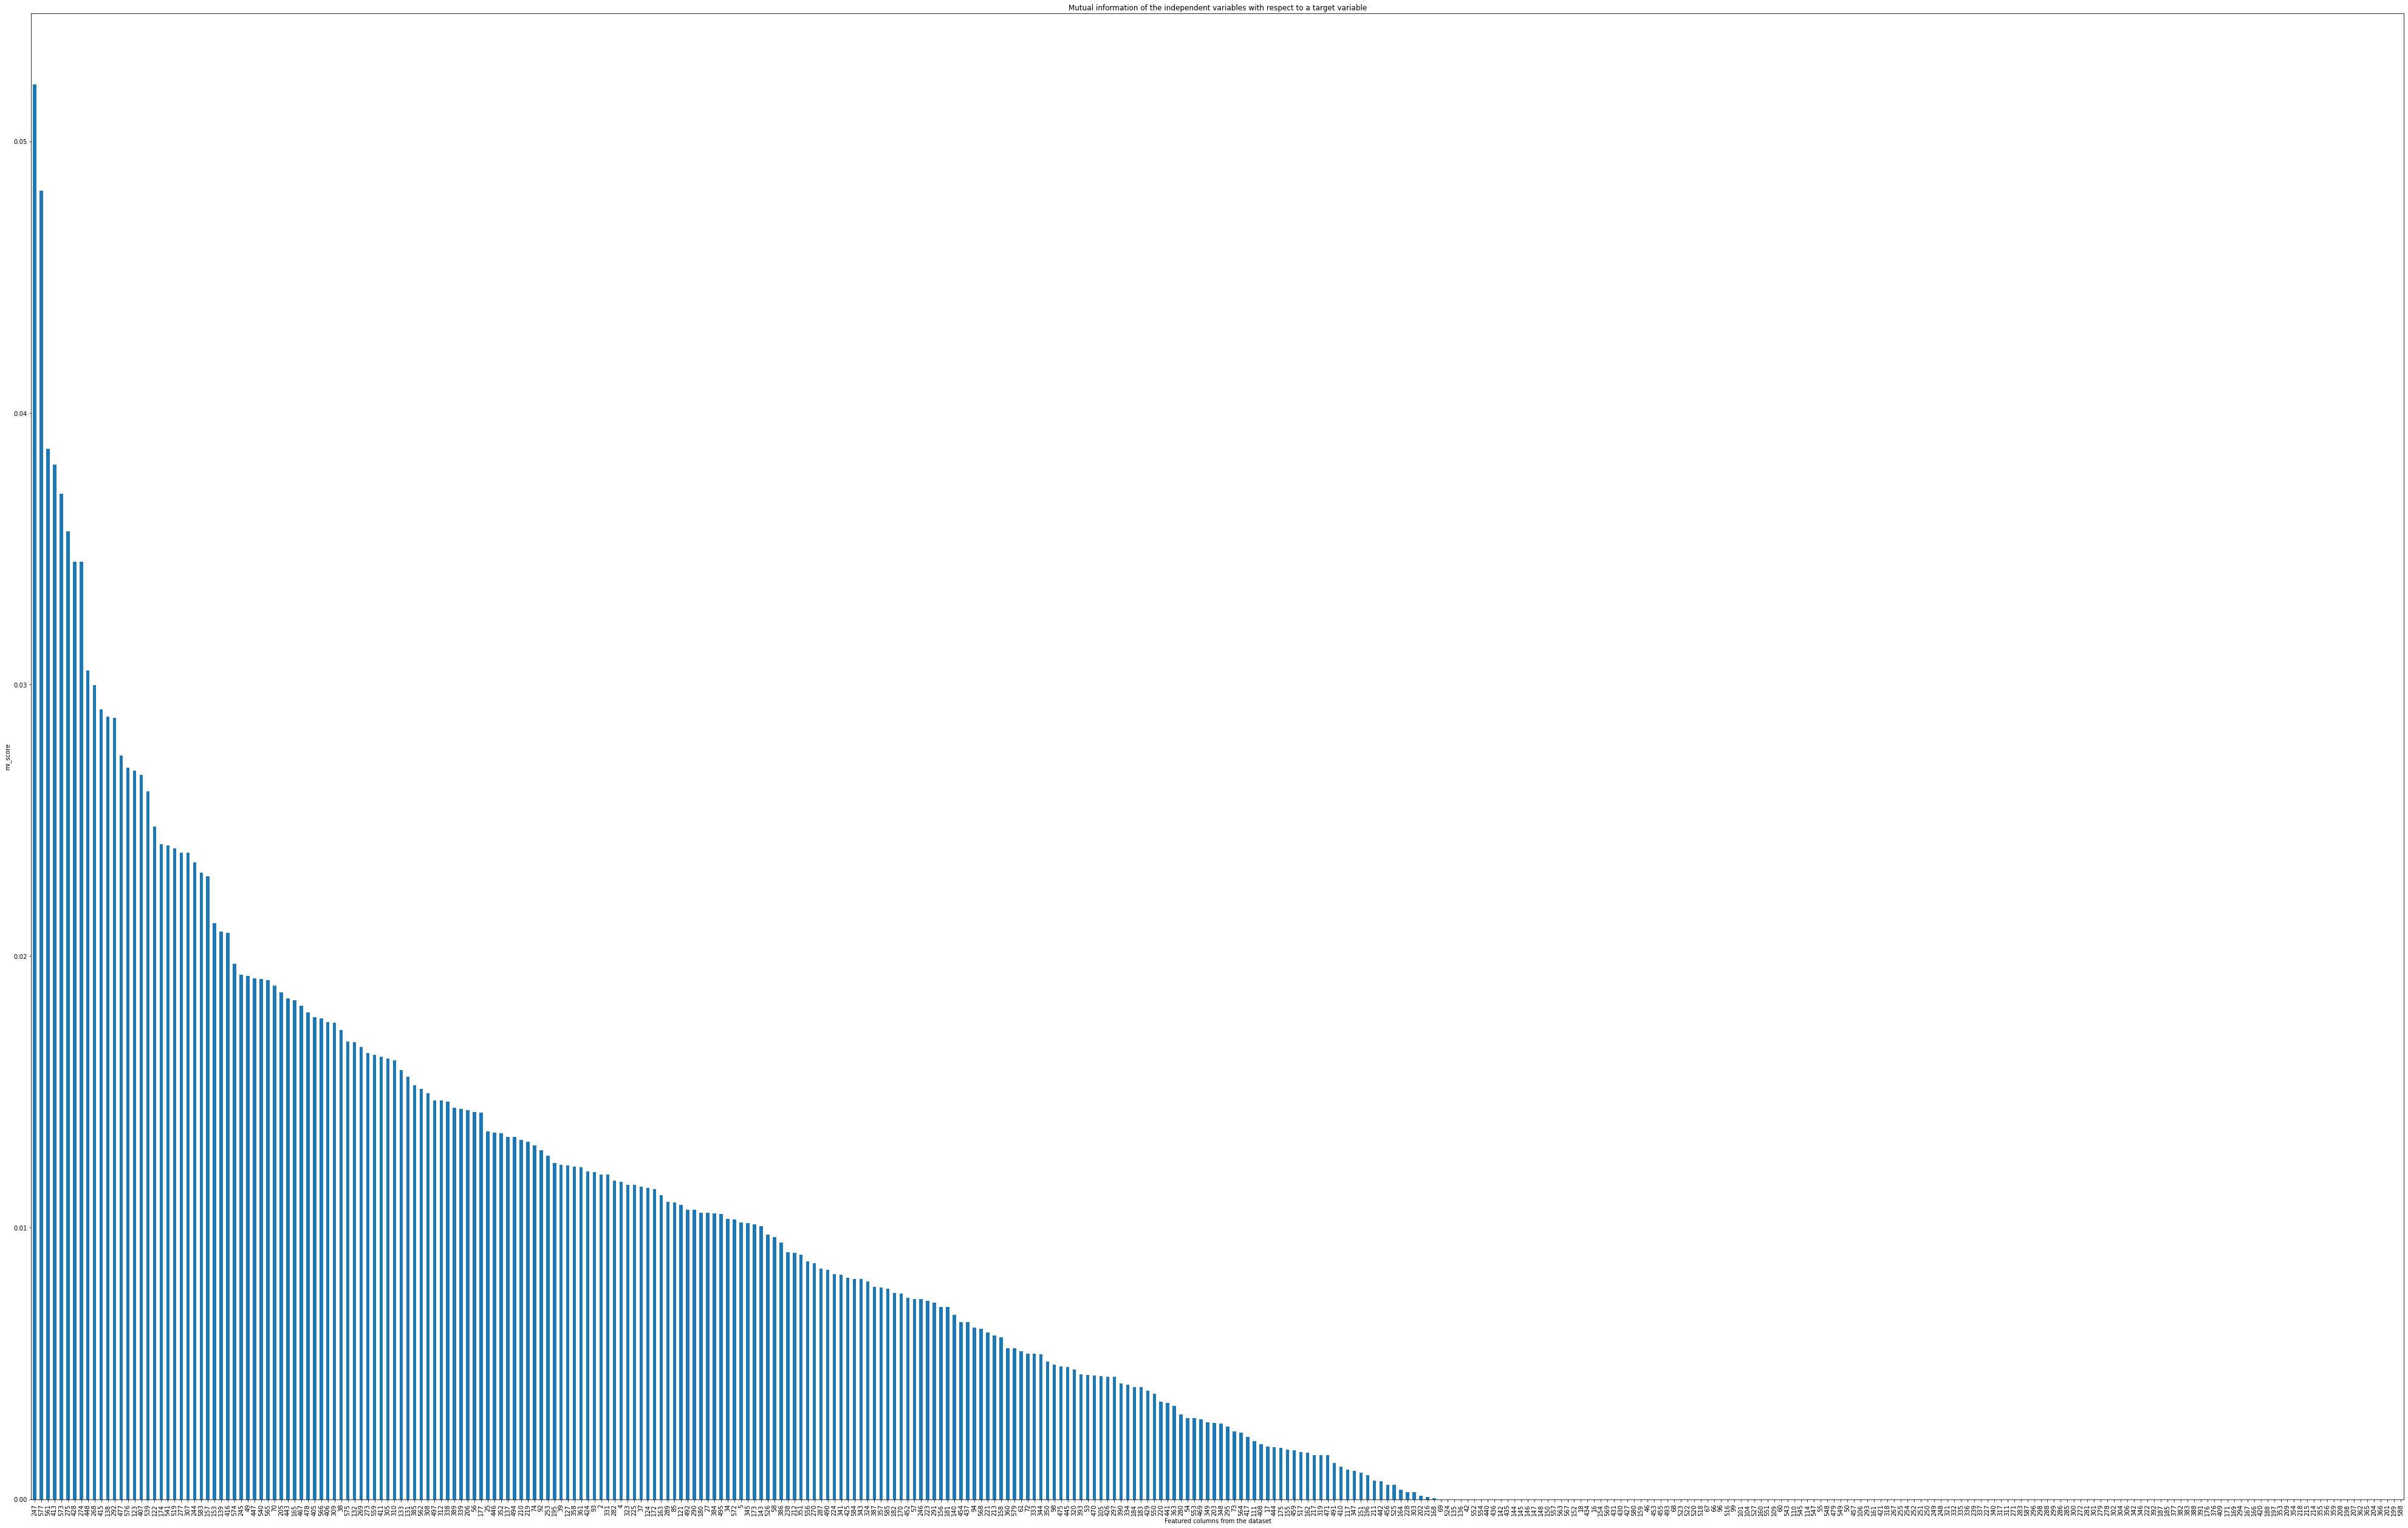

In [47]:
mi = pd.Series(mi_score)
mi.index = filter_X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(70, 45))
plt.title('Mutual information of the independent variables with respect to a target variable');
plt.ylabel('mi_score');
plt.xlabel('Featured columns from the dataset');

**Dividing the dataset for the filtered data into training, validation and test datasets.**

In [48]:
#specify ratio to divide the dataset into train, validate and test
train_ratio = 0.75 # train dataset
validation_ratio = 0.15 # validation dataset
test_ratio = 0.10 # test datastet

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, Y_train, Y_test = train_test_split(filter_X, Y, test_size = 1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

# print shape of X and Y train, validation and test dataframes 
print(X_train.shape,X_val.shape,X_test.shape)
print(Y_train.shape,Y_val.shape, Y_test.shape)

(1175, 356) (235, 356) (157, 356)
(1175, 1) (235, 1) (157, 1)


In [49]:
# saving the filtered columns in an array
filter_num_cols = filter_X.select_dtypes(['float64']).columns
filter_num_cols

Index([  2,   4,   5,  16,  17,  18,  25,  27,  34,  37,
       ...
       575, 576, 577, 579, 580, 583, 584, 585, 587, 588],
      dtype='object', length=356)

Using Standard Scalar to normalize the Filtered datset with 356 columns

In [50]:
# Perform Z-standard normalization (to-> N(0,1))

znormalizer = StandardScaler()

# fit on train set for numerical cols
znormalizer.fit(X_train[filter_num_cols])

StandardScaler()

In [51]:
X_train_norm = pd.DataFrame(znormalizer.transform(X_train[filter_num_cols]), columns = filter_num_cols)
X_val_norm = pd.DataFrame(znormalizer.transform(X_val[filter_num_cols]), columns = filter_num_cols)
X_test_norm = pd.DataFrame(znormalizer.transform(X_test[filter_num_cols]), columns = filter_num_cols)

##### Logistic Regression without correcting class imbalance

In [52]:
logreg = LogisticRegression(C = 1000) 
# 'C'- Inverse of regularization strength; must be a positive float.
#Like in support vector machines, smaller values specify stronger regularization.
logreg.fit(X_train_norm, Y_train)
Y_predict = logreg.predict(X_val_norm)

In [53]:
print('Accuracy is : {:.2f}%'.format(accuracy_score(Y_val,Y_predict)*100))
print('Classification Report is \n'+ classification_report(Y_val,Y_predict))
print('Confusion Matrix is \n')
print(confusion_matrix(Y_val,Y_predict))

Accuracy is : 85.96%
Classification Report is 
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       222
           1       0.14      0.31      0.20        13

    accuracy                           0.86       235
   macro avg       0.55      0.60      0.56       235
weighted avg       0.91      0.86      0.88       235

Confusion Matrix is 

[[198  24]
 [  9   4]]


**Using Smote for correcting class imbalance**

In [54]:
X_train_smote, Y_train_smote = smote.fit_sample(X_train_norm, Y_train)

##### Logistic Regression
(after balancing the dataset with equal number of passed and failed tests)

In [55]:
logreg = LogisticRegression(max_iter=1000)
y_hat_train = logreg.fit(X_train_smote, Y_train_smote)
y_hat_val = logreg.predict(X_val_norm)

In [56]:
print("Accuracy of a logistic classifier is : {:.2f}%".format(accuracy_score(Y_val, y_hat_val)*100))
print("Classification Report of a logisitic classifier is \n"+ classification_report(Y_val, y_hat_val))
print('Confusion Matrix is \n')
print(confusion_matrix(Y_val,Y_predict))

Accuracy of a logistic classifier is : 83.83%
Classification Report of a logisitic classifier is 
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       222
           1       0.12      0.31      0.17        13

    accuracy                           0.84       235
   macro avg       0.54      0.59      0.54       235
weighted avg       0.91      0.84      0.87       235

Confusion Matrix is 

[[198  24]
 [  9   4]]


###### Comparision between imbalanced classes and balanced class machine learning models for filtered datasets (356 columns)

By increasing the instances of the failed cases using SMOTE, following changes can be seen:

1. Accuracy dropped when the failed cases were increased using SMOTE from 83% to 84%.
2. A significant change has been seen in the False Negative cases which is the reason for the reduced accuracy and reduced recall. 
3. The change in False Negative values lead to increase in the True Negative values affecting sensitivity. 


###### Comparision between trained machine learning models before and after feature selection:

After feature selection, the number of columns in the dataset dropped for about 200 columns. We were able to alter the accuracy (Refer to Logistic regression before and after Feature Selection for the imbalanced classes). With the change in the data with SMOTE, there has been change in the FP, FN, TP and TN data, hence reducing the accuracy. 

With reduced data, there is less opportunity to make decisions based on noise.
- Relative to the problem, accuracy seems to improve. 
- Algorithms train the model faster , hence reducing time and efficient analysis. 



### Training the filtered data based on different machine learning model 

#### Decision Tree Classifier on filtered dataset

In [57]:
clf_decision = RandomizedSearchCV(DecisionTreeClassifier(), 
                            {'criterion':['gini','entropy'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50] ,
                            'min_samples_split' :[i for i in range (2,10)],
                            'min_samples_leaf':[j for j in range (1,10)],
                            'max_leaf_nodes': [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50]
                            },
                            
                            cv = 5, return_train_score = False, n_iter = 10)
clf_decision.fit(X_train_smote, Y_train_smote)
clf_decision.cv_results_

{'mean_fit_time': array([0.3333055 , 0.10690026, 0.34715409, 0.21745186, 0.26001625,
        0.19657974, 0.00813766, 0.10781403, 0.06008205, 0.16562581]),
 'std_fit_time': array([0.01505159, 0.00062168, 0.01261914, 0.00633562, 0.00931443,
        0.00249758, 0.00069142, 0.00176319, 0.00208575, 0.00611265]),
 'mean_score_time': array([0.00384445, 0.00389848, 0.00394301, 0.00381713, 0.00380926,
        0.00378165, 0.        , 0.00384769, 0.00405245, 0.00385737]),
 'std_score_time': array([1.18753841e-04, 1.72676068e-04, 1.58778210e-04, 4.37513099e-05,
        5.32888512e-05, 6.17272286e-05, 0.00000000e+00, 1.32952393e-04,
        4.57277248e-04, 1.42622385e-04]),
 'param_min_samples_split': masked_array(data=[4, 6, 4, 2, 4, 7, 9, 3, 4, 3],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[6, 9, 4, 1, 2, 5, 1, 7, 6, 1],
            

In [58]:
clf_decision.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 12,
 'max_depth': 30,
 'criterion': 'entropy'}

In [59]:
clf_decision.best_score_ # best accuracy out of the iteration run using Randomised search

0.8365675419171149

In [60]:
# saving the results from the Randomised search in a dataframe
clf_decision_results = pd.DataFrame(clf_decision.cv_results_)
clf_decision_results[['param_criterion', 'param_min_samples_split','param_min_samples_leaf', 'param_max_leaf_nodes', 'param_max_depth','mean_test_score']]

,param_criterion,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,mean_test_score
0,entropy,4,6,15,6,0.836108
1,gini,6,9,30,2,0.768603
2,entropy,4,4,12,30,0.836568
3,gini,2,1,9,5,0.812699
4,gini,4,2,11,30,0.817292
5,entropy,7,5,9,3,0.776881
6,entropy,9,1,1,4,NaN
7,gini,3,7,2,5,0.676327
8,gini,4,6,5,1,0.676327
9,gini,3,1,5,9,0.774584


In [61]:
y_hat_train = clf_decision.predict(X_train_smote)
y_hat_val = clf_decision.predict(X_val_norm)

In [62]:
print("Accuracy of a decision tree classifier is : {:.2f}%".format(accuracy_score(Y_val, y_hat_val)*100))
print("Classification Report of a decision tree classifier is \n"+ classification_report(Y_val, y_hat_val))

Accuracy of a decision tree classifier is : 77.87%
Classification Report of a decision tree classifier is 
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       222
           1       0.10      0.38      0.16        13

    accuracy                           0.78       235
   macro avg       0.53      0.59      0.52       235
weighted avg       0.91      0.78      0.83       235



In [63]:
precision_train = precision_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
precision_val = precision_score(Y_val, y_hat_val, pos_label = 0) * 100

F1_score_train = f1_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
F1_score_val = f1_score(Y_val, y_hat_val, pos_label = 0) * 100

recall_train = recall_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
recall_val = recall_score(Y_val, y_hat_val, pos_label = 0) * 100

print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the training data.".format(precision_train, recall_train, F1_score_train ))
print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the validation data.".format(precision_val, recall_val, F1_score_val))

Precision = 91% , f1 = 83%  and recall = 87% on the training data.
Precision = 96% , f1 = 80%  and recall = 87% on the validation data.


#### Random Forest Classifier on filtered dataset

In [64]:
clf_random = RandomizedSearchCV(RandomForestClassifier(n_estimators = 100), 
                            {'max_features':['auto','sqrt','log2'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50] ,
                            'min_samples_split' :[i for i in range (2,10)],
                            'min_samples_leaf':[j for j in range (1,10)],
                            'max_leaf_nodes': [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50]
                            }, 
                            cv = 5, return_train_score = False, n_iter = 10)
clf_random.fit(X_train_smote, Y_train_smote)
clf_random.cv_results_

{'mean_fit_time': array([0.46668086, 1.26880941, 0.69772892, 0.04418597, 1.43458557,
        1.02359018, 0.50384998, 0.28005943, 0.95710135, 1.07349229]),
 'std_fit_time': array([0.02618437, 0.02096876, 0.01077058, 0.00076016, 0.02856558,
        0.01787024, 0.01302266, 0.00420372, 0.20598389, 0.14868137]),
 'mean_score_time': array([0.01355362, 0.01584411, 0.01608057, 0.        , 0.01610351,
        0.01480756, 0.01458678, 0.01319056, 0.0199122 , 0.01779923]),
 'std_score_time': array([0.0004037 , 0.00061208, 0.00053919, 0.        , 0.000223  ,
        0.0001789 , 0.00023503, 0.0001625 , 0.01054364, 0.00341915]),
 'param_min_samples_split': masked_array(data=[8, 4, 2, 7, 7, 5, 2, 4, 4, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[7, 1, 6, 8, 6, 7, 8, 1, 4, 5],
              mask=[False, False, False, False, False, False

In [65]:
clf_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 40,
 'max_features': 'log2',
 'max_depth': 30}

In [66]:
clf_random.best_score_ # best accuracy out of the iteration run using Randomised search

0.9733797321522726

In [67]:
clf_random_results = pd.DataFrame(clf_random.cv_results_)
clf_random_results[['param_max_features', 'param_min_samples_split','param_min_samples_leaf', 'param_max_leaf_nodes', 'param_max_depth','mean_test_score']]

,param_max_features,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,mean_test_score
0,sqrt,8,7,2,30,0.770443
1,auto,4,1,30,11,0.955473
2,log2,2,6,40,30,0.973380
3,auto,7,8,1,6,NaN
4,auto,7,6,50,40,0.972460
5,sqrt,5,7,15,8,0.911862
6,log2,2,8,10,11,0.890291
7,log2,4,1,2,9,0.810401
8,auto,4,4,5,8,0.814526
9,auto,7,5,7,40,0.835191


In [68]:
y_hat_train = clf_random.predict(X_train_smote)
y_hat_val = clf_random.predict(X_val_norm)

In [69]:
print("Accuracy of a random forest classifier is : {:.2f}%".format(accuracy_score(Y_val, y_hat_val)*100))
print("Classification Report of a random forest classifier is \n"+ classification_report(Y_val, y_hat_val))

Accuracy of a random forest classifier is : 91.91%
Classification Report of a random forest classifier is 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       222
           1       0.00      0.00      0.00        13

    accuracy                           0.92       235
   macro avg       0.47      0.49      0.48       235
weighted avg       0.89      0.92      0.90       235



In [70]:
precision_train = precision_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
precision_val = precision_score(Y_val, y_hat_val, pos_label = 0) * 100

F1_score_train = f1_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
F1_score_val = f1_score(Y_val, y_hat_val, pos_label = 0) * 100

recall_train = recall_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
recall_val = recall_score(Y_val, y_hat_val, pos_label = 0) * 100

print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the training data.".format(precision_train, recall_train, F1_score_train ))
print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the validation data.".format(precision_val, recall_val, F1_score_val))

Precision = 100% , f1 = 100%  and recall = 100% on the training data.
Precision = 94% , f1 = 97%  and recall = 96% on the validation data.


##### SVM Classifier on filtered dataset

In [71]:
from sklearn.model_selection import GridSearchCV
    
hyper_parameter_space = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                         'degree': [1,2,3,4,5,6,7,8,9,10],
                         'C': [1,2,3,4,5,6,7,8,9,10],
                         'gamma':['scale',' auto']}

svc = SVC()
clf_svc = RandomizedSearchCV(svc, hyper_parameter_space, 
                   cv = 5, return_train_score = False, n_iter = 10)

clf_svc.fit(X_train_smote, Y_train_smote)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'gamma': ['scale', ' auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [72]:
clf_svc.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'C': 10}

In [73]:
clf_svc.best_score_

0.993572709058315

In [74]:
# saving the results from the Randomised search in a dataframe
clf_results = pd.DataFrame(clf_svc.cv_results_)
clf_results[['param_C', 'param_degree','param_gamma', 'param_kernel']]

,param_C,param_degree,param_gamma,param_kernel
0,10,1,auto,linear
1,10,1,scale,rbf
2,7,3,auto,rbf
3,9,4,auto,poly
4,2,5,scale,sigmoid
5,5,5,auto,poly
6,8,3,scale,sigmoid
7,7,7,auto,linear
8,4,1,auto,poly
9,6,9,scale,linear


In [75]:
y_hat_train = clf_svc.predict(X_train_smote)
y_hat_val = clf_svc.predict(X_val_norm)

In [76]:
print("Accuracy of a support vector metric classifier is : {:.2f}%".format(accuracy_score(Y_val, y_hat_val)*100))
print("Classification Report of a support vector metric classifier is \n"+ classification_report(Y_val, y_hat_val))

Accuracy of a support vector metric classifier is : 94.04%
Classification Report of a support vector metric classifier is 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       222
           1       0.00      0.00      0.00        13

    accuracy                           0.94       235
   macro avg       0.47      0.50      0.48       235
weighted avg       0.89      0.94      0.92       235



In [77]:
precision_train = precision_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
precision_val = precision_score(Y_val, y_hat_val, pos_label = 0) * 100

F1_score_train = f1_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
F1_score_val = f1_score(Y_val, y_hat_val, pos_label = 0) * 100

recall_train = recall_score(Y_train_smote, y_hat_train, pos_label = 0) * 100
recall_val = recall_score(Y_val, y_hat_val, pos_label = 0) * 100

print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the training data.".format(precision_train, recall_train, F1_score_train ))
print("Precision = {:.0f}% , f1 = {:.0f}%  and recall = {:.0f}% on the validation data.".format(precision_val, recall_val, F1_score_val))

Precision = 100% , f1 = 100%  and recall = 100% on the training data.
Precision = 94% , f1 = 100%  and recall = 97% on the validation data.


##### Plot ROC curve for all classifiers and calculate Area Under the Curve (AUC)

In [78]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(models, model_names):
    
    plt.figure(0, figsize = [15,12 ]).clf()
    plt.plot([-2, 2], [-2, 2],'k--')
    plt.xlim([0, 2])
    plt.ylim([0, 2])
    plt.title('Receiver Operating Characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    for iii, model in enumerate(models):
        y_prob_val = model.predict(X_val_norm)
        fpr, tpr, threshold = roc_curve(Y_val, y_prob_val)
        roc_auc = auc(fpr, tpr)


        plt.plot(fpr, tpr, label = "{} AUC = {:0.2f}".format(model_names[iii], roc_auc))

    plt.legend(loc = 'lower right');






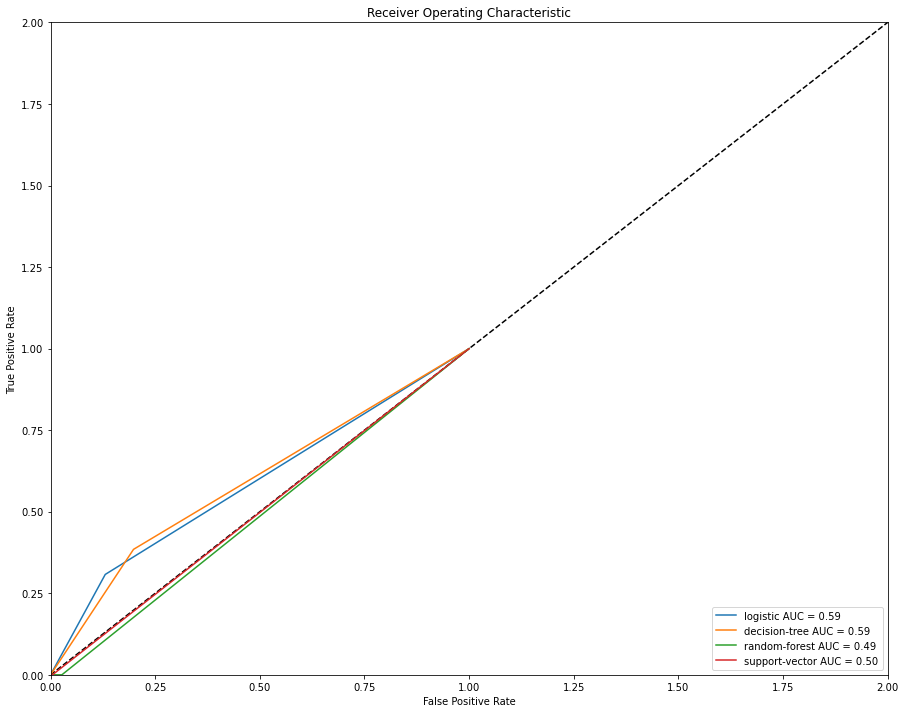

In [79]:
plot_roc([logreg, clf_decision, clf_random, clf_svc], ['logistic','decision-tree' ,'random-forest','support-vector'])

Out of the four trained models, we found out that after predicting the target values for the validation sets for the four models (logisitic, decision tree, random forest and svc), `accuracy` is the best for `random forest` and `support vector classififer` and we will using these two to predict the test dataset. We have come to this conclusion after feature selection and using smote for managing class imbalance.

##### Model Selection and Reporting on Test Set

##### Random Forest Test

In [80]:
y_hat_test = clf_random.predict(X_test_norm) #test set

In [81]:
accuracy_test = accuracy_score(Y_test, y_hat_test)*100
print("Accuracy of a support vector metric classifier for test dataset is : {:.2f}%".format(accuracy_test))
print("Classification Report of a support vector metric classifier for test dataset is \n"+ classification_report(Y_test, y_hat_test))

Accuracy of a support vector metric classifier for test dataset is : 95.54%
Classification Report of a support vector metric classifier for test dataset is 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       152
           1       0.00      0.00      0.00         5

    accuracy                           0.96       157
   macro avg       0.48      0.49      0.49       157
weighted avg       0.94      0.96      0.95       157



###### Support Vector Classifier

In [82]:
y_hat_test = clf_svc.predict(X_test_norm) #test set

In [83]:
accuracy_test = accuracy_score(Y_test, y_hat_test)*100
print("Accuracy of a support vector metric classifier for test dataset is : {:.2f}%".format(accuracy_test))
print("Classification Report of a support vector metric classifier for test dataset is \n"+ classification_report(Y_test, y_hat_test))

Accuracy of a support vector metric classifier for test dataset is : 95.54%
Classification Report of a support vector metric classifier for test dataset is 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       152
           1       0.00      0.00      0.00         5

    accuracy                           0.96       157
   macro avg       0.48      0.49      0.49       157
weighted avg       0.94      0.96      0.95       157



In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(models, model_names):
    
    plt.figure(0, figsize = [15,12 ]).clf()
    plt.plot([-2, 2], [-2, 2],'k--')
    plt.xlim([0, 2])
    plt.ylim([0, 2])
    plt.title('Receiver Operating Characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    for iii, model in enumerate(models):
        y_prob_test = model.predict(X_test_norm)
        fpr, tpr, threshold = roc_curve(Y_test, y_prob_test)
        roc_auc = auc(fpr, tpr)


        plt.plot(fpr, tpr, label = "{} AUC = {:0.2f}".format(model_names[iii], roc_auc))

    plt.legend(loc = 'lower right');


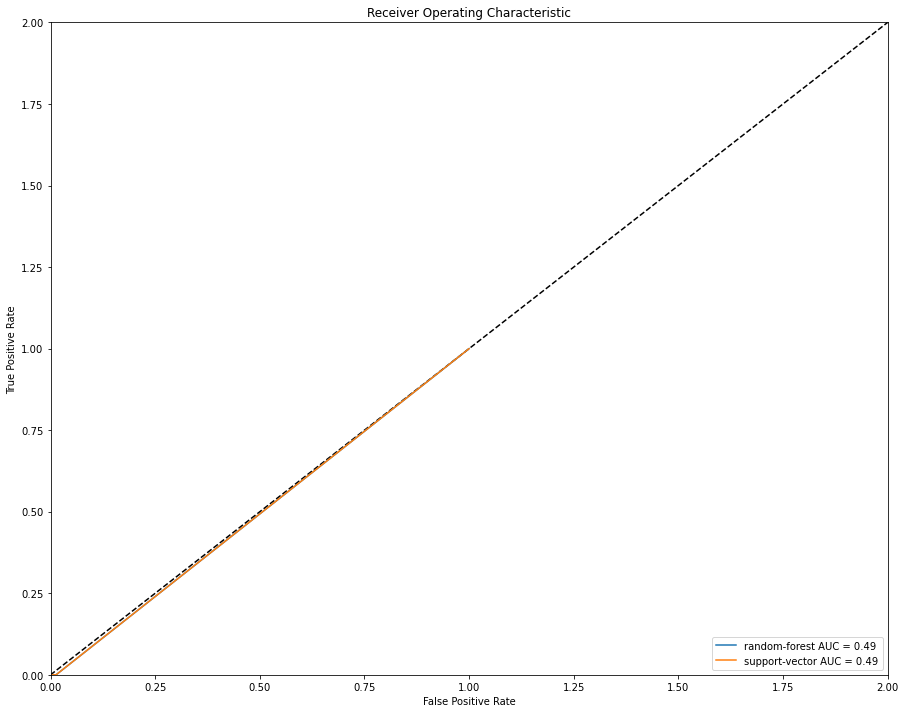

In [85]:
plot_roc([ clf_random, clf_svc], ['random-forest','support-vector'])

Evaluating the four models, we narrowed down to two models (Random Forest Classififer and Support Vecotr Classifier) for analysis on the test data. Though have an accuracy of almost 91-94% with the support vector model, the computational cost for the SVM model is a lot and the for a larger dataset the training time is a lot. So the better option is `Random Forest`. Though accuracy is lesser than Support vector but the model can be trained pretty quickly and chances of overfitting is a lot less.

###### Using a Random Forest Classififer algorithm, a highly efficient model can be created to train the dataset and then find the faulty products during the product manufacturing phase in a Diaper Manufacturing company. This can help reduce the cost in makng faulty items and  company can benefit from selling high quality material. 

**Addition for Milestone 3**

### Neural Network Model

We are creating a `Sequential model` which basically represents plain stack of layers where each layer has exactly one input tensor and one output tensor.<br/>
<br/>
`build_model` is a custom function which is used to create a sequential model. In this model,the `Neural Network` can layers can range between 2 to 20 and inside each layer , we are using `Keras.layers.dense` function to create nodes or neurons. The number of neurons that can be present can vary from 32 to 512. 

We will be doing a random search in these neurons to figure out the best neural network present. 

The hyperparamters that we are trying to define include:

1. how many number of hidden layer we should have?
2. how many number of neurons we should have in hidden layers?
3. What should be the learning rate? We could give multiple values here to search from. 

In [86]:
import tensorflow as tf
from tensorflow import keras # for the sequential model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch

For Neural Network, we need to convert the data into numpy arrays. Converting the `Target variables` values into an array

In [87]:
# Y for labels
Y_train_smote = Y_train_smote.values 
Y_val = Y_val.values
Y_test = Y_test.values 

In [88]:
# Y for labels
X_train_smote = X_train_smote.values 
X_val_norm = X_val_norm.values
X_test_norm = X_test_norm.values 

**To find the number of features for Neural Network**

In [89]:
# x-data feature size
n_features = X_train_smote.shape[1] 
n_features 

356

##### Build the model

In [90]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),activation='sigmoid', input_shape = (n_features,)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer= keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), # choose either one of the learning rate
        loss='binary_crossentropy',
        metrics=['accuracy']) # metrics are the basis for hidden layer performing well
    return model


'Random Search' will help decide the `number of layers` and the `number of neurons` needed to build an efficient Neural Network model but initally the range of layers needs to be decided. 

In [91]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy', # whenever we are training the model, we will have this paramter
    max_trials= 5, 
    executions_per_trial= 3,
    directory='project', # make sure all the weights are stored in this particular directory
    project_name='Diaper Manufacturing')


INFO:tensorflow:Reloading Oracle from existing project project/Diaper Manufacturing/oracle.json
INFO:tensorflow:Reloading Tuner from project/Diaper Manufacturing/tuner0.json


In [92]:
# what all searches we are doing, giving the information of the space size, learning rate choice for whole model and also layer wise 
tuner.search_space_summary()

In [93]:
tuner.search(X_train_smote, Y_train_smote,
             epochs= 5,
             validation_data=(X_val, Y_val))  

INFO:tensorflow:Oracle triggered exit


**Get the model with the best hyperparameters for maximum accuracy in prediting the validation set**

In [94]:
model1 = tuner.get_best_models(num_models =1)[0]

**Model summary**

In [95]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               57120     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               41216     
_________________________________________________________________
dense_2 (Dense)              (None, 192)               49344     
_________________________________________________________________
dense_3 (Dense)              (None, 192)               37056     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 193       
Total params: 184,929
Trainable params: 184,929
Non-trainable params: 0
_________________________________________________________________


##### Fit/Train the model

In [96]:
model_logs1 = model1.fit(X_train_smote, Y_train_smote,
                       epochs = 5,
                       validation_data = (X_val_norm, Y_val), verbose=1)

Epoch 1/5
69/69 [==============================] - ETA: 0s - loss: 60.1161 - accuracy: 0.718 - ETA: 0s - loss: 51.0550 - accuracy: 0.728 - ETA: 0s - loss: 31.5255 - accuracy: 0.732 - ETA: 0s - loss: 24.0331 - accuracy: 0.707 - 0s 5ms/step - loss: 23.3237 - accuracy: 0.7075 - val_loss: 0.5894 - val_accuracy: 0.4936
Epoch 2/5
69/69 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.78 - ETA: 0s - loss: 0.5981 - accuracy: 0.70 - ETA: 0s - loss: 0.5631 - accuracy: 0.74 - ETA: 0s - loss: 0.5480 - accuracy: 0.75 - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7502 - val_loss: 0.5196 - val_accuracy: 0.7319
Epoch 3/5
69/69 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.78 - ETA: 0s - loss: 0.5134 - accuracy: 0.77 - ETA: 0s - loss: 0.5225 - accuracy: 0.76 - ETA: 0s - loss: 0.5046 - accuracy: 0.77 - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7700 - val_loss: 0.6220 - val_accuracy: 0.7106
Epoch 4/5
69/69 [==============================] - ETA: 0s - loss: 0.4

##### Evaluate the model

In [97]:
val_loss, val_acc = model1.evaluate(X_val_norm, Y_val, verbose=1)

8/8 [==============================] - ETA: 0s - loss: 1.1248 - accuracy: 0.59 - 0s 2ms/step - loss: 1.0906 - accuracy: 0.6043


Accuracy:

In [98]:
print('Loss for validation set: {:.4f}, Accuracy on validation set: {:.4f}%'.format(val_loss, val_acc*100))

Loss for validation set: 1.0906, Accuracy on validation set: 60.4255%


Confusion Matrix:

In [99]:
from sklearn.metrics import confusion_matrix
tf_val_probs = model1.predict(X_val_norm)

# predict will give a 10000 X 10 array of probabilities
# Need to convert it to a 10000 X 1 where we find ARG max for each row.

tf_val_preds = np.argmax(tf_val_probs, axis=1)

conf_mat_val_tf = pd.DataFrame(confusion_matrix(Y_val, tf_val_preds))
conf_mat_val_tf

,0,1
0,222,0
1,13,0


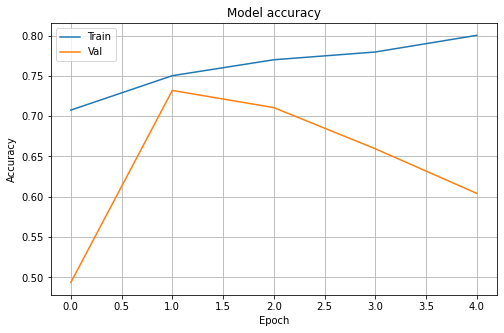

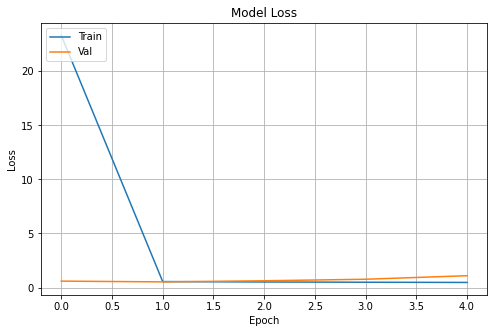

In [100]:
plt.rcParams['figure.figsize'] = (8,5)
# Plot accuracy
plt.plot(model_logs1.history['accuracy'])
plt.plot(model_logs1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid()
plt.show()
# plot loss
plt.plot(model_logs1.history['loss'])
plt.plot(model_logs1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid()
plt.show()

#### Second Neural Network with more hidden layers

In [101]:
#-------------------------
# Set some hyper parameters
#-------------------------

# Total number of training epochs
epochs = 5

# Training batch size
batch_size = 15000

# The optimization initial learning rate
learning_rate = 0.05

# Hidden layer sizes
h_layer_seq = [200, 100, 50, 30, 10]
# We need to setup the final labels count.
final_count = 10


In [102]:
from tensorflow.keras.layers import Dense, Dropout
# Initialize a "sequential model" with tf.keras
model2 = tf.keras.Sequential()

# Add layers sequentially
for h_ix, h_num in enumerate(h_layer_seq):
    if h_ix == 0:
        # Need to set input Dimensions
        model2.add(Dense(h_num, activation='relu', kernel_initializer='random_normal', input_shape=(n_features,)))
    else:
        model2.add(Dense(h_num, activation='relu', kernel_initializer='random_normal'))
        # Add dropout!
        model2.add(Dropout(rate=0.5))


# Add final output
model2.add(Dense(final_count, activation='sigmoid'))


In [103]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               71400     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)               

In [104]:
# Setup model with ADAM optimization and cross entropy loss.
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               71400     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)               

In [105]:
X_train_smote.shape

(2178, 356)

In [106]:
X_val_norm.shape

(235, 356)

In [107]:
# Y_train_smote = np.asarray(train_labels).astype('float32').reshape((-1,1))
# y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [108]:
#Y_val.reshape((-1,1))

In [109]:
#Y_train_smote.reshape((-1,1))

In [110]:
[print(i.shape, i.dtype) for i in model2.inputs]
[print(o.shape, o.dtype) for o in model2.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model2.layers]

(None, 356) <dtype: 'float32'>
(None, 10) <dtype: 'float32'>
dense_5 (None, 356) float32
dense_6 (None, 200) float32
dropout (None, 100) float32
dense_7 (None, 100) float32
dropout_1 (None, 50) float32
dense_8 (None, 50) float32
dropout_2 (None, 30) float32
dense_9 (None, 30) float32
dropout_3 (None, 10) float32
dense_10 (None, 10) float32


[None, None, None, None, None, None, None, None, None, None]

In [111]:
model_logs2 = model2.fit(X_train_smote, Y_train_smote,
                       epochs= 5,
                       validation_data=(X_val_norm, Y_val))


Epoch 1/5
69/69 [==============================] - ETA: 0s - loss: 2.3119 - accuracy: 0.0000e+ - ETA: 0s - loss: 2.2732 - accuracy: 0.3901   - ETA: 0s - loss: 2.0709 - accuracy: 0.31 - 0s 4ms/step - loss: 1.9898 - accuracy: 0.3237 - val_loss: 1.1214 - val_accuracy: 0.9447
Epoch 2/5
69/69 [==============================] - ETA: 0s - loss: 1.4982 - accuracy: 0.46 - ETA: 0s - loss: 1.5057 - accuracy: 0.41 - ETA: 0s - loss: 1.5024 - accuracy: 0.41 - 0s 2ms/step - loss: 1.4859 - accuracy: 0.4141 - val_loss: 1.1038 - val_accuracy: 0.9447
Epoch 3/5
69/69 [==============================] - ETA: 0s - loss: 1.3732 - accuracy: 0.43 - ETA: 0s - loss: 1.3754 - accuracy: 0.46 - ETA: 0s - loss: 1.3797 - accuracy: 0.45 - 0s 3ms/step - loss: 1.3653 - accuracy: 0.4481 - val_loss: 1.0991 - val_accuracy: 0.9447
Epoch 4/5
69/69 [==============================] - ETA: 0s - loss: 1.3224 - accuracy: 0.34 - ETA: 0s - loss: 1.2653 - accuracy: 0.46 - ETA: 0s - loss: 1.2519 - accuracy: 0.46 - 0s 2ms/step - loss: 

##### Evaluate the model

In [112]:
val_loss, val_acc = model2.evaluate(X_val_norm, Y_val, verbose=1)

8/8 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 1.00 - 0s 2ms/step - loss: 1.0986 - accuracy: 0.9447


Accuracy:

In [113]:
print('Loss for validation set: {:.4f}, Accuracy on validation set: {:.4f}%'.format(val_loss, val_acc*100))

Loss for validation set: 1.0986, Accuracy on validation set: 94.4681%


Confusion Matrix:

In [114]:
from sklearn.metrics import confusion_matrix
tf_val_probs = model1.predict(X_val_norm)

# predict will give a 10000 X 10 array of probabilities
# Need to convert it to a 10000 X 1 where we find ARG max for each row.

tf_val_preds = np.argmax(tf_val_probs, axis=1)

conf_mat_val_tf = pd.DataFrame(confusion_matrix(Y_val, tf_val_preds))
conf_mat_val_tf

,0,1
0,222,0
1,13,0


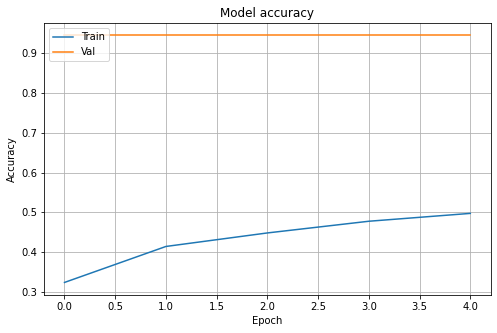

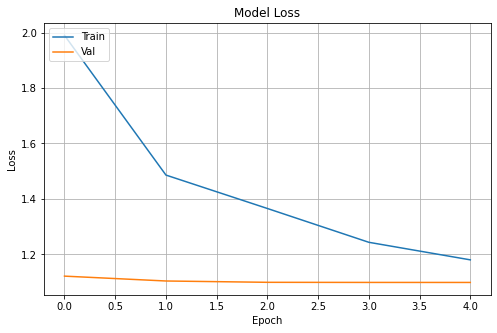

In [123]:
plt.rcParams['figure.figsize'] = (8,5)
# Plot accuracy
plt.plot(model_logs2.history['accuracy'])
plt.plot(model_logs2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid()
plt.show()
# plot loss
plt.plot(model_logs2.history['loss'])
plt.plot(model_logs2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid()
plt.show()

##### Model Selection and Reporting on Test Set

In [116]:
model_logs_test = model2.fit(X_train_smote, Y_train_smote,
                       epochs = 5,
                       validation_data = (X_test_norm, Y_test), verbose=1)

Epoch 1/5
69/69 [==============================] - ETA: 0s - loss: 1.1336 - accuracy: 0.43 - ETA: 0s - loss: 1.1751 - accuracy: 0.49 - ETA: 0s - loss: 1.1740 - accuracy: 0.49 - 0s 3ms/step - loss: 1.1634 - accuracy: 0.4995 - val_loss: 1.0986 - val_accuracy: 0.9682
Epoch 2/5
69/69 [==============================] - ETA: 0s - loss: 1.1706 - accuracy: 0.62 - ETA: 0s - loss: 1.1481 - accuracy: 0.49 - ETA: 0s - loss: 1.1421 - accuracy: 0.50 - 0s 2ms/step - loss: 1.1464 - accuracy: 0.4954 - val_loss: 1.0986 - val_accuracy: 0.9682
Epoch 3/5
69/69 [==============================] - ETA: 0s - loss: 1.1793 - accuracy: 0.62 - ETA: 0s - loss: 1.1392 - accuracy: 0.51 - ETA: 0s - loss: 1.1480 - accuracy: 0.50 - 0s 2ms/step - loss: 1.1446 - accuracy: 0.5014 - val_loss: 1.0986 - val_accuracy: 0.9682
Epoch 4/5
69/69 [==============================] - ETA: 0s - loss: 1.1444 - accuracy: 0.46 - ETA: 0s - loss: 1.1343 - accuracy: 0.48 - ETA: 0s - loss: 1.1435 - accuracy: 0.49 - 0s 2ms/step - loss: 1.1425 -

In [117]:
# evaluate the model
test_loss, test_acc = model2.evaluate(X_test_norm, Y_test, verbose=1)

5/5 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 1.00 - 0s 4ms/step - loss: 1.0986 - accuracy: 0.9682


In [118]:
print('Loss on test set: {:.4f}, Accuracy on test set: {:.4f}%'.format(test_loss, test_acc*100))

Loss on test set: 1.0986, Accuracy on test set: 96.8153%


In [119]:
from sklearn.metrics import confusion_matrix
tf_test_probs = model2.predict(X_test_norm)

# predict will give a 10000 X 10 array of probabilities
# Need to convert it to a 10000 X 1 where we find ARG max for each row.

tf_test_preds = np.argmax(tf_test_probs, axis=1)

conf_mat_test_tf = pd.DataFrame(confusion_matrix(Y_test, tf_test_preds))
conf_mat_test_tf

,0,1
0,152,0
1,5,0


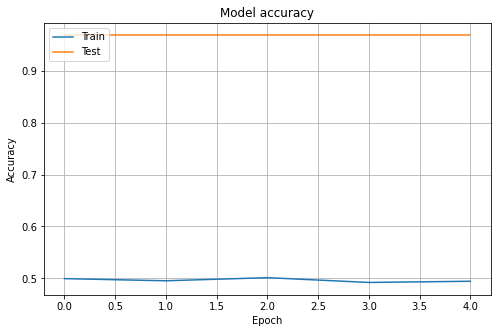

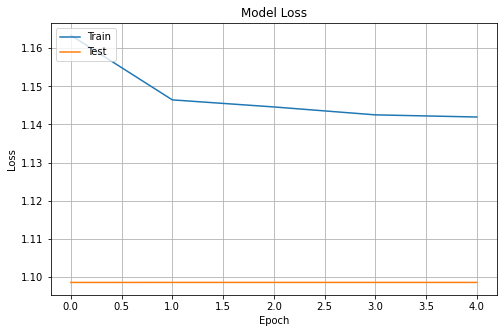

In [120]:
# Plot accuracy
plt.plot(model_logs_test.history['accuracy'])
plt.plot(model_logs_test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# plot loss
plt.plot(model_logs_test.history['loss'])
plt.plot(model_logs_test.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

From the Milestone2, I selected **Random Forest Classifier** for the comparision with the Neural Network

In [121]:
y_hat_test = clf_random.predict(X_test_norm) #test set

In [122]:
accuracy_test = accuracy_score(Y_test, y_hat_test)*100
print("Accuracy of a support vector metric classifier for test dataset is : {:.2f}%".format(accuracy_test))
print("Classification Report of a support vector metric classifier for test dataset is \n"+ classification_report(Y_test, y_hat_test))

Accuracy of a support vector metric classifier for test dataset is : 95.54%
Classification Report of a support vector metric classifier for test dataset is 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       152
           1       0.00      0.00      0.00         5

    accuracy                           0.96       157
   macro avg       0.48      0.49      0.49       157
weighted avg       0.94      0.96      0.95       157



Based on the analysis above, I will recommend the diaper manufacturer to go and use the Random Forest Classiifer to design a machine leanring model for identifying the failed and passed products. The biggest reason for choosing Random Forest over Neural Network is that Random Forest classifier is less computationally expensive and does not require a GPU to finish training. A random forest gives a different interpretation of a decision tree but with better performance. 

The performance accuarcy(~90-95%) for the Random Forest is comparable tp the Neural Network with hidden layers and dropouts. Keeping in mind the manufacturing cost and the results of the machine learning models, I will suggest the diaper manufacturing company to work with the datascience team and create a machine learning model to detect the failed products. Using the model results will really help in identifying the faulty products and overall will reduce the cost related to the product quality. 